# Logistic Regression in Python
# Part 1 - Exploring the data and building the model

## Import packages and read data
---


In [1]:
# Import the required packages

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import sklearn.metrics as metrics
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
df = pd.read_csv("../datasets/student_pass.csv")

## Data Exploration
---
Familiarise yourself with the data (shape of the data, basic summary, correlation etc.)

In [2]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Student        100 non-null    int64  
 1   Hours_Studied  100 non-null    float64
 2   Hours_Slept    100 non-null    float64
 3   Pass           100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


,Student,Hours_Studied,Hours_Slept,Pass
count,100.000000,100.000000,100.000000,100.000000
mean,50.500000,5.121000,7.079000,0.530000
std,29.011492,2.025808,1.034779,0.501614
min,1.000000,0.000000,4.800000,0.000000
25%,25.750000,3.700000,6.300000,0.000000
50%,50.500000,5.150000,7.000000,1.000000
75%,75.250000,6.500000,7.825000,1.000000
max,100.000000,9.500000,9.400000,1.000000


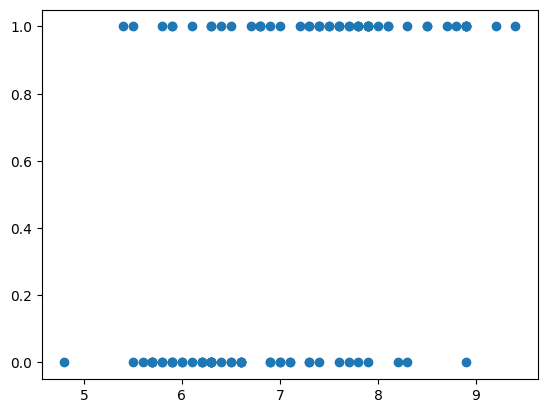

In [3]:
# plot a scatter plot of 'Hours Slept' vs 'Pass'
plt.scatter(df['Hours_Slept'],df['Pass'])


<Axes: >

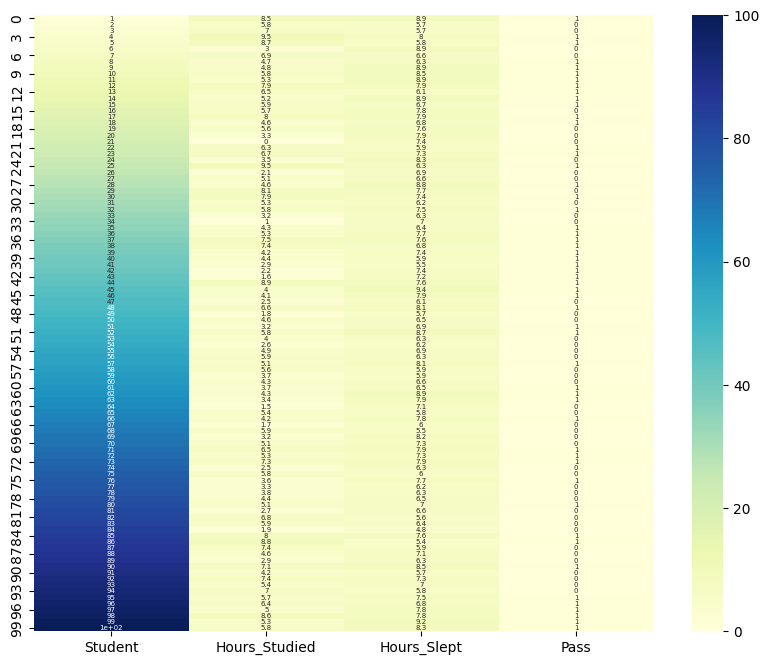

In [4]:
# plot a heatmap of correlations with seaborn 
plt.figure(figsize=(10, 8))
sns.heatmap(df, annot=True, cmap='YlGnBu', annot_kws={"size": 5})

## Split the DataFrame into train and test data
---

In [5]:
train, test = train_test_split(df, random_state=13)
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75 entries, 59 to 82
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Student        75 non-null     int64  
 1   Hours_Studied  75 non-null     float64
 2   Hours_Slept    75 non-null     float64
 3   Pass           75 non-null     int64  
dtypes: float64(2), int64(2)
memory usage: 2.9 KB
<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 37 to 20
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Student        25 non-null     int64  
 1   Hours_Studied  25 non-null     float64
 2   Hours_Slept    25 non-null     float64
 3   Pass           25 non-null     int64  
dtypes: float64(2), int64(2)
memory usage: 1000.0 bytes


## Train the model
---

In [6]:
dependent_var = train['Pass']
independent_vars = train[['Hours_Studied', 'Hours_Slept']]
independent_vars = sm.add_constant(independent_vars)

In [7]:
# Build the model
model = sm.Logit(
    dependent_var,
    independent_vars
).fit()

Optimization terminated successfully.
         Current function value: 0.505466
         Iterations 6


In [8]:
# Print model summary statistics
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   Pass   No. Observations:                   75
Model:                          Logit   Df Residuals:                       72
Method:                           MLE   Df Model:                            2
Date:                Wed, 08 Nov 2023   Pseudo R-squ.:                  0.2699
Time:                        15:37:07   Log-Likelihood:                -37.910
converged:                       True   LL-Null:                       -51.926
Covariance Type:            nonrobust   LLR p-value:                 8.183e-07
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -10.4435      2.443     -4.275      0.000     -15.231      -5.656
Hours_Studied     0.3491      0.164      2.125      0.034       0.027       0.671
Hours_Slept       1.2519      0.321      3.903      0.000       0.623       1.881
=================================================================================
"""

## Logit function
---

### Is the model a good fit?


To understand if a model can be used to make a prediction we need to look at additional elements of the Logit Regression results:
- **coef** : the coefficients of the independent variables in the regression equation.
<br>
- **Log-Likelihood** : the natural logarithm of the Maximum Likelihood Estimation(MLE) function. MLE is the optimization process of finding the set of parameters that result in the best fit. 
    - A higher (non-negative) number is better, but does not soley represent 'goodness of fit'.
<br>
- **LL-Null** : the value of log-likelihood of the model when no independent variable is included(only an intercept is included).
     - In general, a larger LL-Null value indicates a worse fit, while a smaller value indicates a better fit. But the meaningful interpretation lies in comparing the LL-Null value to the log-likelihood values of other models being considered.
<br>
- **Pseudo R-squ.** : a substitute for the R-squared value in Least Squares linear regression. It is the ratio of the log-likelihood of the null model to that of the full model.
     - These R-squared measures provide an indication of how much of the variation in the response variable is explained by the model. 

## Predict data for the test set and compare
---

In [9]:
test

,Student,Hours_Studied,Hours_Slept,Pass
37,38,7.4,6.8,1
62,63,3.4,7.9,1
83,84,1.9,4.8,0
14,15,5.9,6.7,1
43,44,8.9,7.6,1
9,10,5.8,8.5,1
44,45,4.0,9.4,1
31,32,5.8,7.5,1
69,70,5.1,7.3,0
57,58,5.6,5.9,0


In [10]:

test[['Hours_Studied','Hours_Slept']].shape

(25, 2)

In [11]:
# Predict the model results on the test data

predicted = model.predict(sm.add_constant(test[['Hours_Studied','Hours_Slept']]))

# predicted = model.predict([[7,8]])

In [12]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   Pass   No. Observations:                   75
Model:                          Logit   Df Residuals:                       72
Method:                           MLE   Df Model:                            2
Date:                Wed, 08 Nov 2023   Pseudo R-squ.:                  0.2699
Time:                        15:37:07   Log-Likelihood:                -37.910
converged:                       True   LL-Null:                       -51.926
Covariance Type:            nonrobust   LLR p-value:                 8.183e-07
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -10.4435      2.443     -4.275      0.000     -15.231      -5.656
Hours_Studied     0.3491      0.164      2.125      0.034       0.027       0.671
Hours_Slept       1.2519      0.321      3.903      0.000       0.623       1.881
=================================================================================
"""

In [13]:
# explre the predicted data

#predicted.head(5)
predicted.head(10).sort_index()

9     0.902223
14    0.500922
31    0.725177
37    0.657570
43    0.898220
44    0.938228
57    0.249264
62    0.653231
69    0.616700
83    0.022507
dtype: float64

In [14]:
# explore the test 'Pass' data
test['Pass'].head(10).sort_index()

9     1
14    1
31    1
37    1
43    1
44    1
57    0
62    1
69    0
83    0
Name: Pass, dtype: int64

# Part 2 - Model Validation


## Validating our model
---
Validating a logistic regression model involves assessing how well the model fits the data and how well it can predict outcomes for new data. Here are some common methods for model validation:
- Confusion Matrix, True Positive and True Negative Rate
- Area Under the Curve (AUC)
- Receiver Operating Characteristic curve (ROC)


### Confusion Matrix

In [15]:
# We use 0.5 as the threshold
predicted_labels = predicted > 0.5  

# Generate confusion matrix
cm = metrics.confusion_matrix(test['Pass'], predicted_labels)

print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[ 6  5]
 [ 4 10]]


### True Positive Rate and True Negative Rate

In [16]:
# Calculate TPR and TNR
TN, FP, FN, TP = cm.ravel()

TPR = TP / (TP + FN)
TNR = TN / (TN + FP)
print(TN)
print(FN)
print(FP)
print(TP)
print(f"True Positive Rate (TPR): {TPR}")
print(f"True Negative Rate (TNR): {TNR}")

6
4
5
10
True Positive Rate (TPR): 0.7142857142857143
True Negative Rate (TNR): 0.5454545454545454


### AUC score

In [17]:
# Calculate the AUC Score

metrics.roc_auc_score(test['Pass'],predicted)

0.7857142857142857

### ROC curve

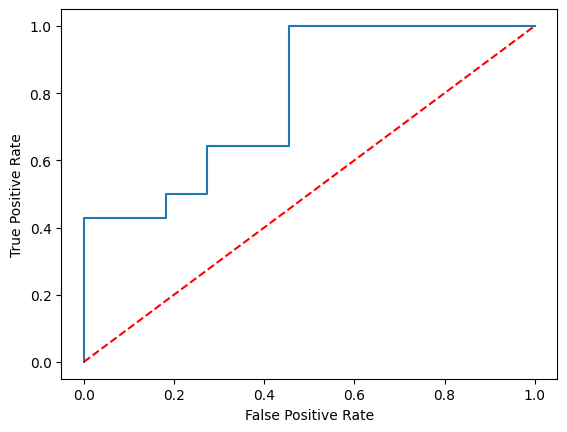

In [18]:
# Plot the ROC Curve

fpr, tpr, _ = metrics.roc_curve(test['Pass'],predicted)

plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

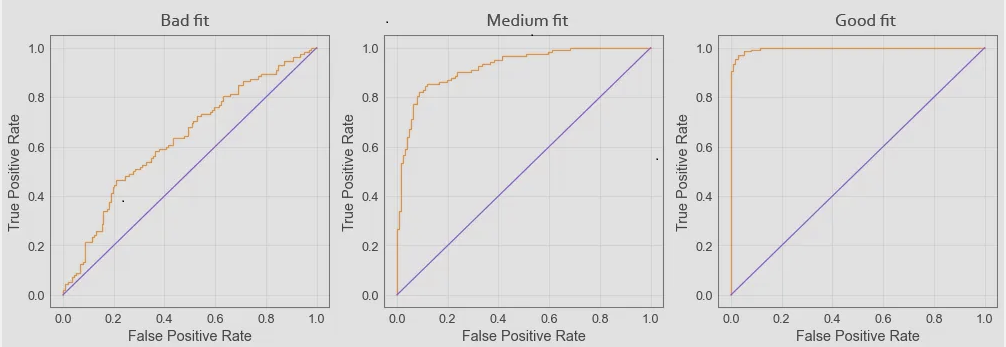

## Making a prediction
---
# calculate the log odds
logit = const + coef_studied * hours_studied + coef_slept * hours_slept

# transform the log odds into a probability
P = 1 / (1 + np.exp(-logit))


In [19]:
# Making a prediction, 
new_data = [[1, 7, 8]]  

# Make the prediction
predicted_values = model.predict(sm.add_constant(new_data))
predicted_values[0]

0.8823753980211198